In [18]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

In [4]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
#Data Inspection
housing.shape

(545, 13)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
#Data Cleaning
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

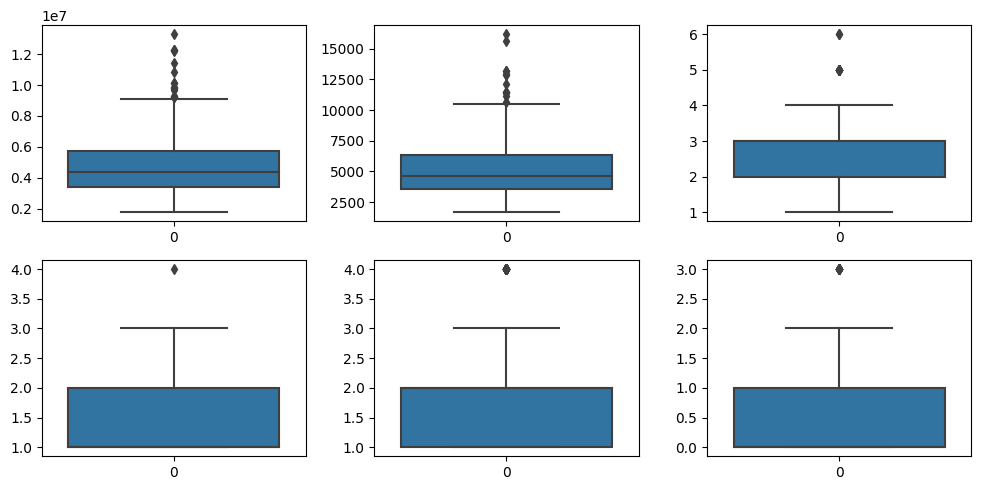

In [9]:
# Outlier Analysis
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

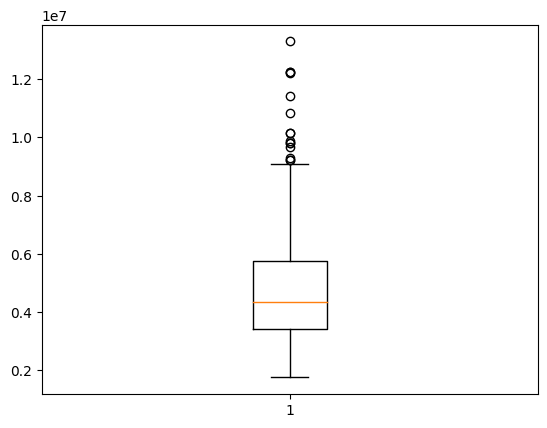

In [10]:
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

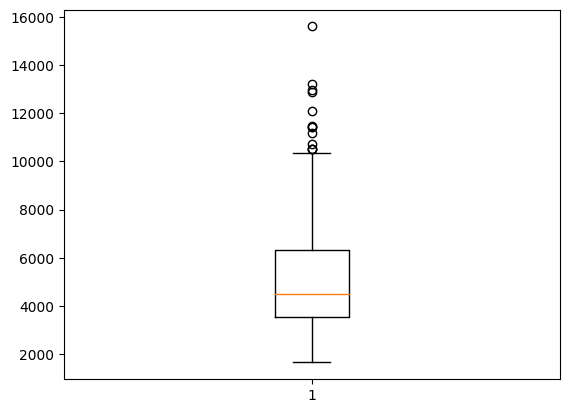

In [11]:
# outlier treatment for area
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

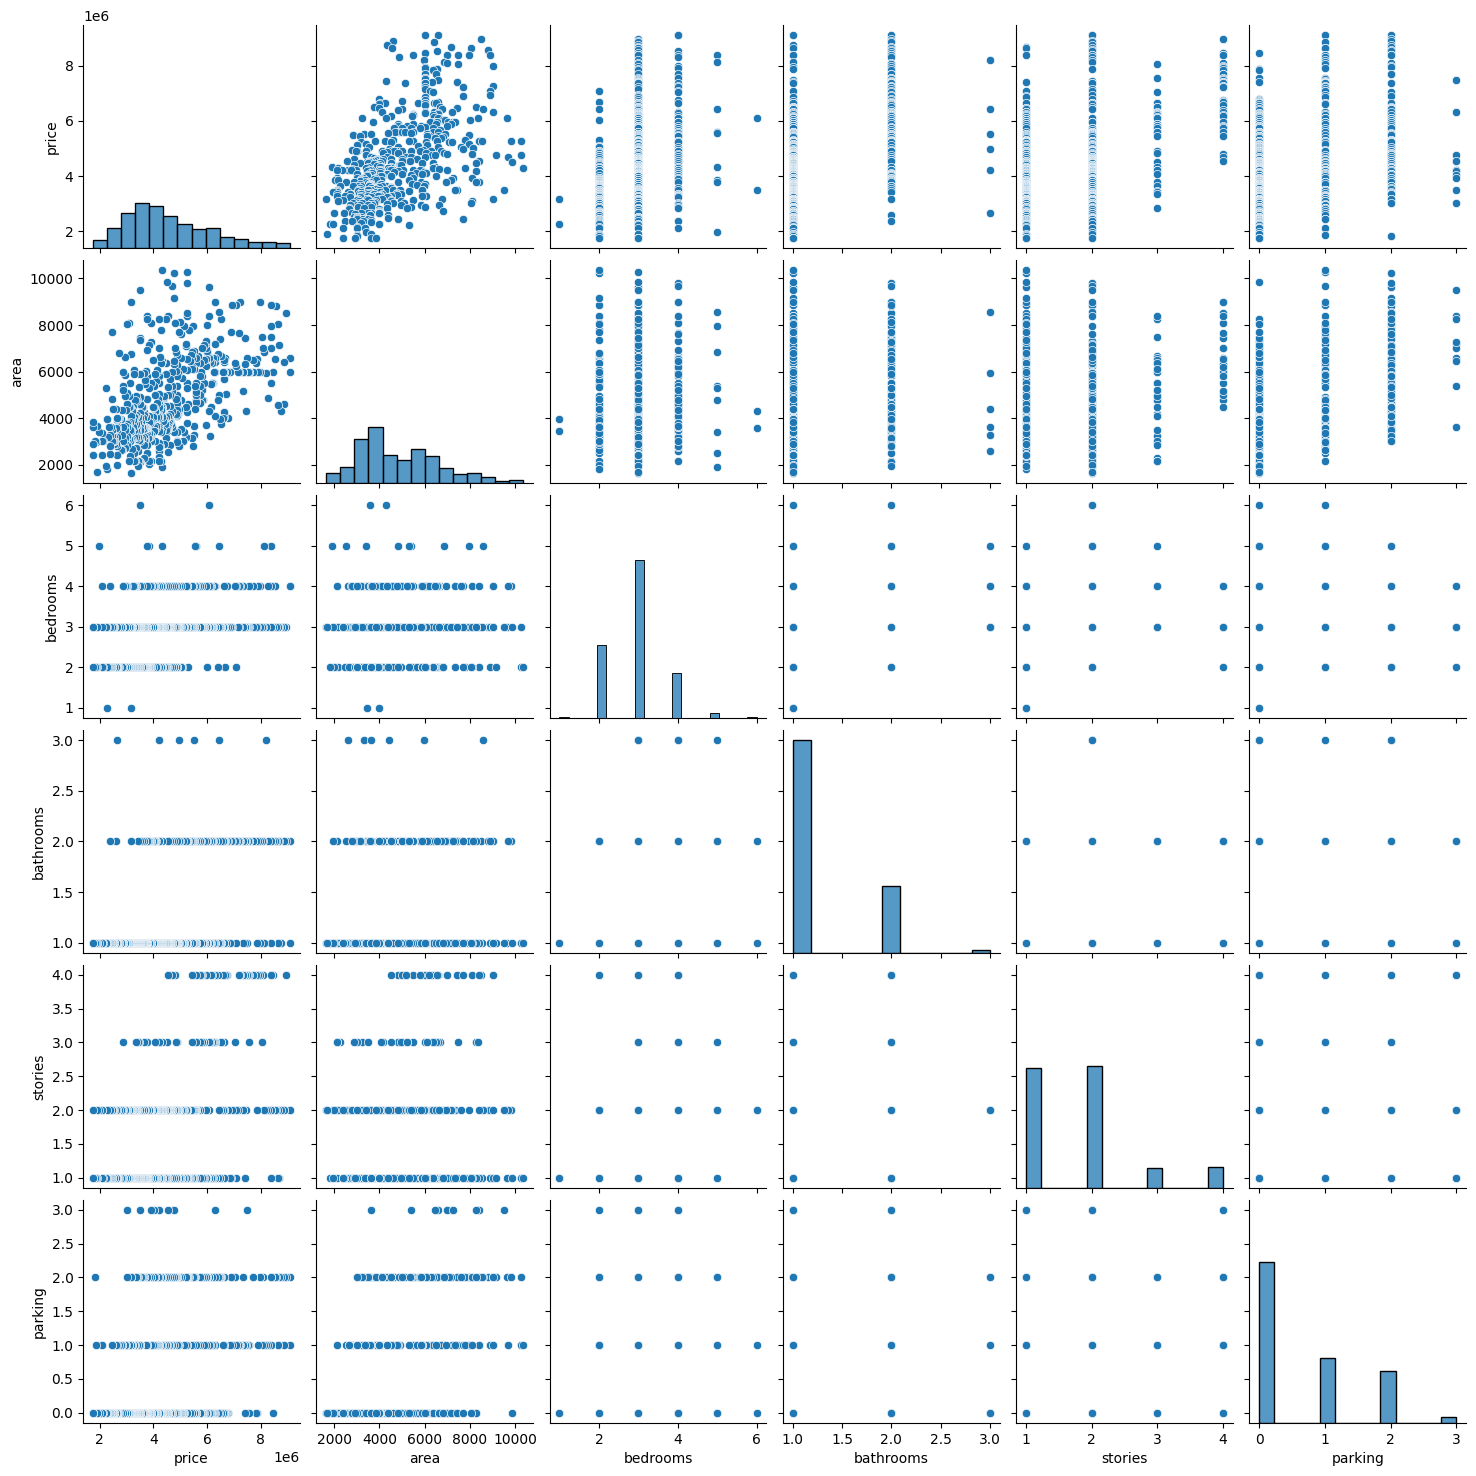

In [13]:
sns.pairplot(housing)

<ipython-input-14-5a41f3dad0a4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['price'])


<Axes: xlabel='price', ylabel='Density'>

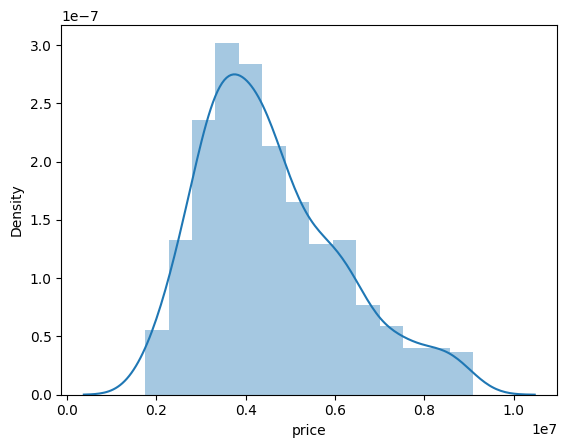

In [14]:
sns.distplot(housing['price'])

<ipython-input-15-31f0b49718e2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing.corr(),annot=True)


<Axes: >

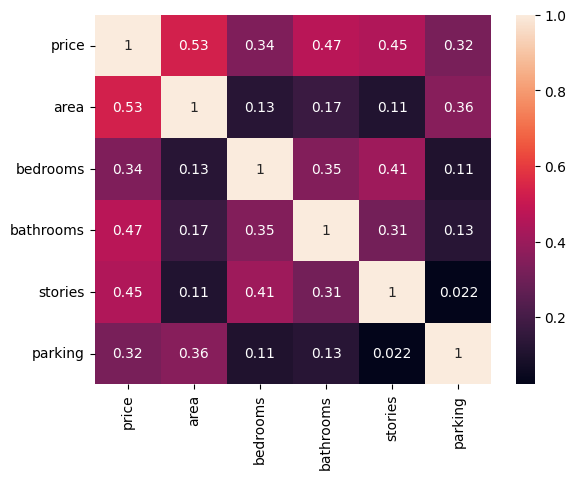

In [15]:
sns.heatmap(housing.corr(),annot=True)

In [16]:
X = housing[['area', 'bedrooms', 'bathrooms', 'stories','parking']]
y = housing['price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression()

In [22]:
print(lm.intercept_)

111723.14953211788


In [23]:
lm.coef_

array([3.80789775e+02, 1.21508511e+05, 9.16305775e+05, 5.14054056e+05,
       2.50251730e+05])

In [24]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['coeff'])
cdf

,coeff
area,380.789775
bedrooms,121508.511345
bathrooms,916305.775493
stories,514054.056441
parking,250251.729529


In [25]:
predictions = lm.predict(X_test)
predictions

array([3761216.87055344, 6227652.95252124, 3117520.00124509,
       3848624.22965895, 5279312.12256326, 4719944.38174468,
       3308259.1057204 , 3563031.89811571, 4375438.75621465,
       6015245.10495026, 3551620.34519081, 4653431.44805932,
       4320090.38603145, 3738697.24610661, 2813232.39771212,
       3597302.9779009 , 3155943.19556401, 4465515.80612919,
       4209304.99405141, 6031890.4349747 , 6773032.91378758,
       5158480.25065737, 8102293.01019904, 7099981.47427276,
       3984639.02657073, 3117864.21802491, 3498418.89783489,
       5971689.3763613 , 3714634.64315978, 4209304.99405141,
       5871958.72931049, 3269110.60595232, 3248880.33341815,
       4211589.73270376, 3251140.63941175, 3917522.74634599,
       4022252.22690041, 5661195.7008569 , 3040636.74071773,
       3935861.66121906, 4024143.88345546, 3810545.25211986,
       3932754.33736162, 4846467.73041776, 6712738.3909925 ,
       5775922.5444484 , 5536369.50162584, 4352935.58647101,
       6338203.24892028,

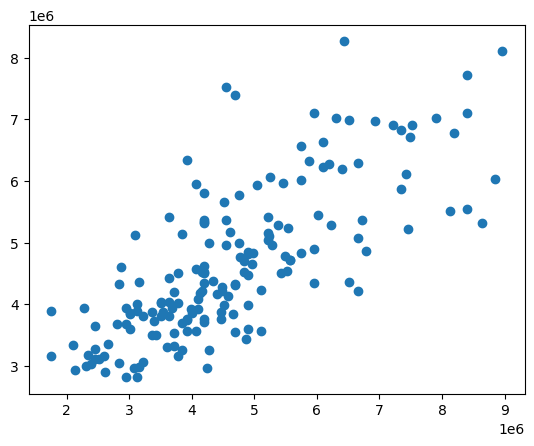

In [26]:
plt.scatter(y_test,predictions)

<ipython-input-27-5eafd2b47918>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions,bins=30)


<Axes: xlabel='price', ylabel='Density'>

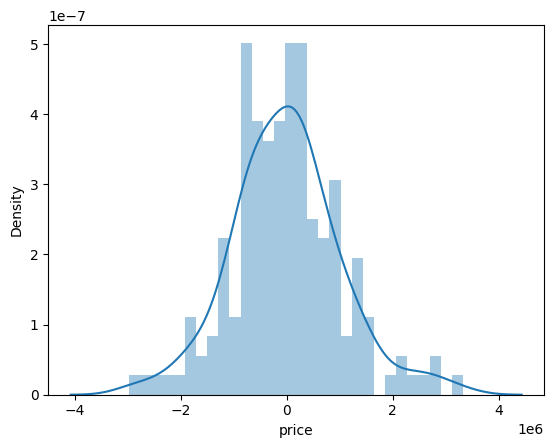

In [27]:
sns.distplot(y_test-predictions,bins=30)

In [28]:
metrics.mean_absolute_error(y_test,predictions)

781004.9589450888

In [29]:
metrics.mean_squared_error(y_test,predictions)

1061699896006.6593

In [30]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

1030388.2258676384